## This is the script to generate Figures 1d, 1e, 1f and 1g

In [27]:
library(ggplot2)
library(dplyr)
library(ggstatsplot)
library(grid)
library(ggthemes)
library(RColorBrewer)
library(ggpubr)
library(grid)
library(ggthemes)

In [105]:
scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

col1 <- brewer.pal(11,'Spectral')[1]
col2 <- brewer.pal(11,'Spectral')[11]

In [137]:
dir <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/visualize4paper/same_diff_organs"
setwd(dir)

In [138]:
#read in the GTEx tissue data
rt <- NULL
rt_dup <- NULL
dat <- NULL
infile <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/dge_data_collection/fc_stat_stat/forTissueDiff.gtex_tissue.all_reads.edgeR.logCPM5.stat.forTissueDiff"
rt <- read.csv(infile, sep="\t", header=F)

colnames(rt) <- c("tissue", "t1", "t2", "dfc", "p", "", "", "", "", "", "group")
study <- "GTEx tissues"
rt$study <- study
#only select tissues with more than 5 samples
selected_tissues <- names(table(rt$tissue))[table(rt$tissue) >5]
rt <- rt[rt$t1 %in% selected_tissues & rt$t2 %in% selected_tissues, ]
diff_organ <- rt[rt$group == "diff_organ",]


In [ ]:
#read in the clean name
clean_names <- read.csv("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/dge_data_collection/fc_stat_stat/GTEx_names_cleanup.v3.txt", sep="\t", header=F)
colnames(clean_names) <- c("tissue", "name", "organ")

In [139]:
#calculate the median delta fold change for each tissue
meds <- aggregate(diff_organ$dfc, by=list(diff_organ$tissue), median)
ordered_names <- meds[order(meds$x, decreasing=F),1]
rt$t1 <- factor(rt$t1, levels=ordered_names)
rt$t2 <- factor(rt$t2, levels=ordered_names)

#duplicate the records by swapping the two tissues in each comparison 
rt_dup <- rt
rt_dup$t1 <- rt$t2
rt_dup$t2 <- rt$t1
dat <- rbind(rt_dup, rt)
#add clean names
dat$t1_clean <- clean_names[match(dat$t1, clean_names$tissue),2]
dat$t2_clean <- clean_names[match(dat$t2, clean_names$tissue),2]
ordered_names_clean <- clean_names[match(ordered_names, clean_names$tissue),2]
dat$t1_clean <- factor(dat$t1_clean, levels=ordered_names_clean)
dat$t2_clean <- factor(dat$t2_clean, levels=ordered_names_clean)

In [140]:
#add clean name for GTEx tissues
rt_gtex <- rt
rt_gtex <- cbind(rt_gtex, clean_names[match(rt$tissue, clean_names$tissue),2:3])
#separate them into two data frames, comparisons between different organs and within a same organ 
gtex_diff_organ <- rt_gtex[rt_gtex$group=="diff_organ",]
gtex_same_organ <- rt_gtex[rt_gtex$group!="diff_organ",]
gtex_diff_organ$tissue <- factor(gtex_diff_organ$tissue, levels=ordered_names)
uniq_gtex <- unique(rt_gtex[,c("dfc", "group","organ")])
dim(rt_gtex)
dim(uniq_gtex)

[1] 1122   14

[1] 1102    3

In [141]:
#output folder
vis_dir <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/visualize4paper/Figures/"

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


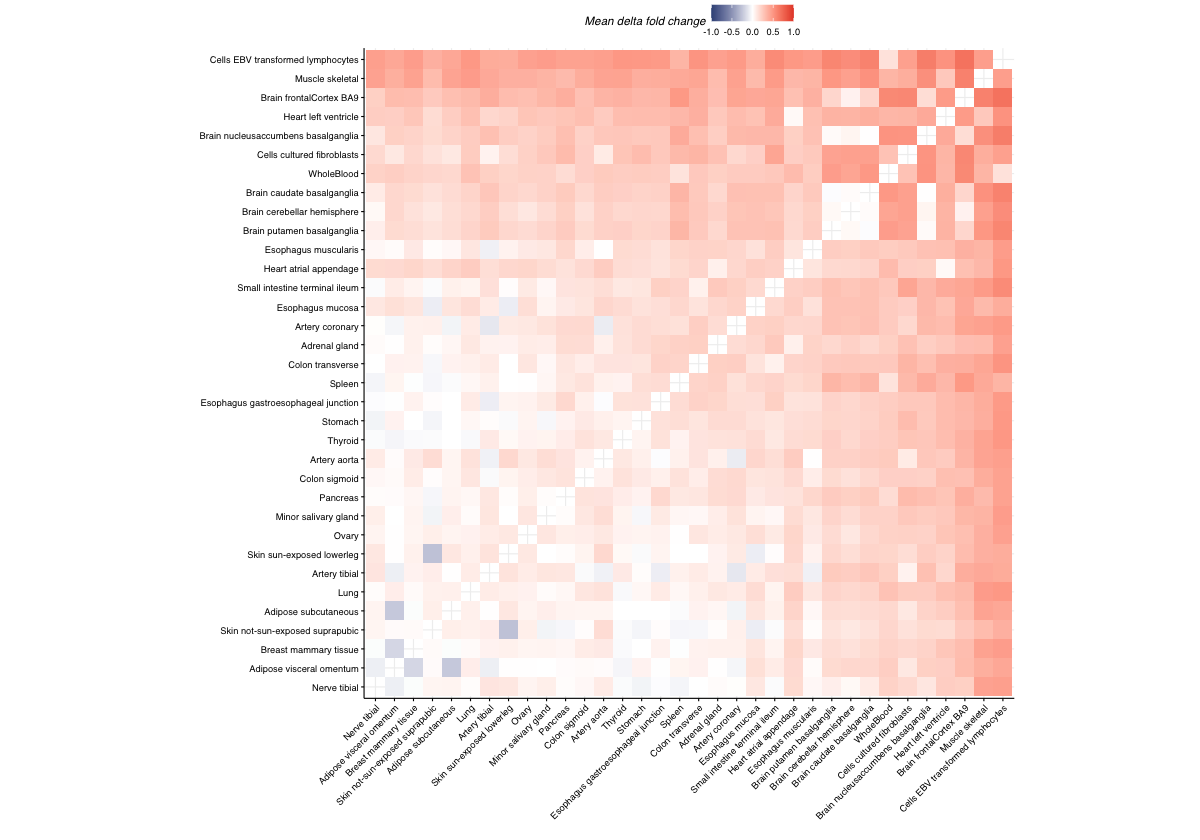

In [142]:
#load shared colors or values
#generate the heatmap plot
source("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/visualize4paper/shared/shared.R")
options(repr.plot.width=10, repr.plot.height=7)
theme_Publication <- function(base_size=pt_sz, base_family=family_sz) {

      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "top",
               legend.direction = "horizontal",
               legend.key.size= unit(0.35, "cm"),
               legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(1,1,1,1),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}
ggplot(data = dat, aes(x=t1_clean, y=t2_clean, fill=dfc)) + 
  geom_tile() +
 scale_fill_gradient2(low = con_sz[1], high = con_sz[length(con_sz)], mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Mean delta fold change") +
  theme_Publication()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = pt_sz-1.45, hjust = 1))+
 coord_fixed()+
    xlab('') +
ylab('')
ggsave(paste0(vis_dir, "/Figure1d.Heatmap.tissue_diff.GTEx_tissue.pdf"), width = 4.5*1.15, height = 4.5*1.15, units = "in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


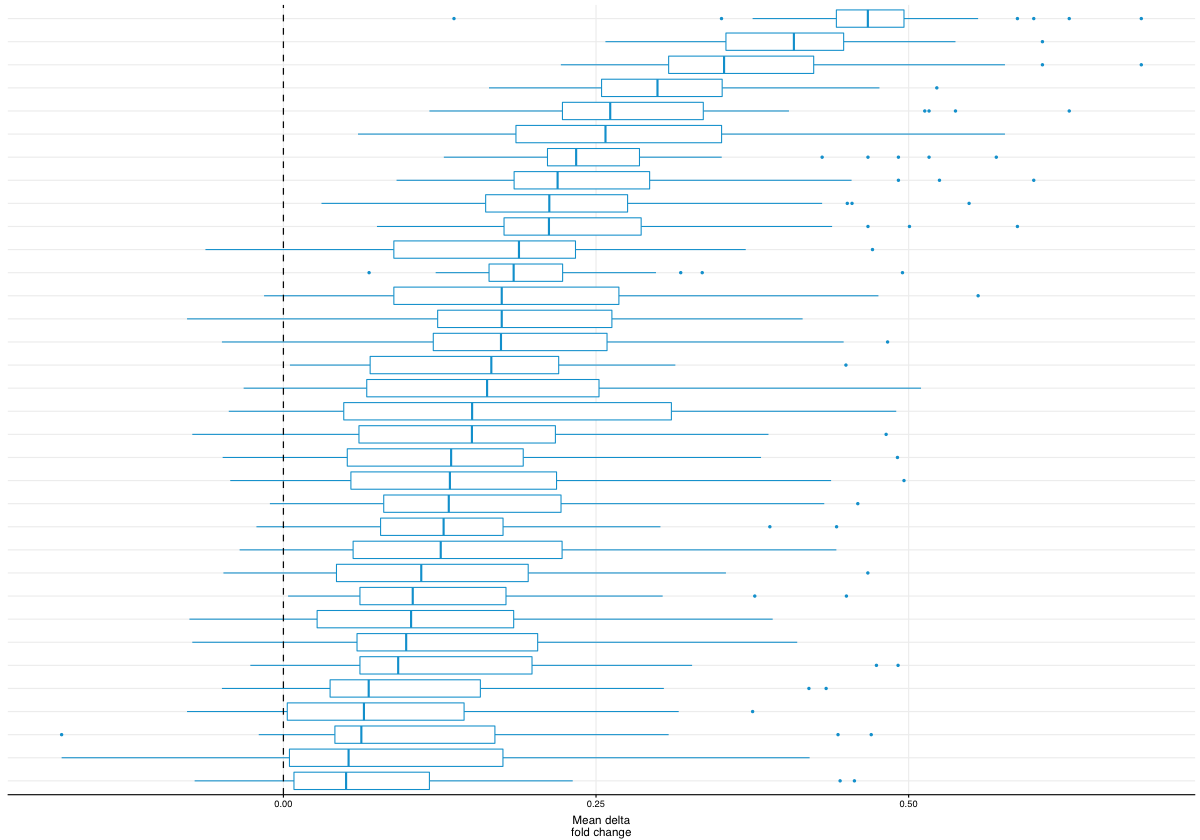

In [129]:
#generate the boxplot
ggplot(data = gtex_diff_organ, aes(x=dfc, y=tissue)) + 
             geom_boxplot(size=0.30,
                         outlier.size = 0.3,
                         col=col_sz[1]) +
    geom_vline(xintercept=0, linetype="dashed", color = "#060606", size=0.35)+
            theme_Publication() +
        theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y = element_blank()
        
             ) +
        labs(x="Mean delta\nfold change")
ggsave(paste0(vis_dir, "/Figure1e.visualize_tissue_diff.pdf"), width = 1*1.2, height = 3.2*1.23, units = "in")

In [130]:
#read in the SRA human tissue data
rt <- NULL
infile <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/dge_data_collection/fc_stat_stat/forTissueDiff.SRA_tissue.all_reads.edgeR.logCPM5.stat.forTissueDiff"
rt <- read.csv(infile, sep="\t", header=F)

colnames(rt) <- c("tissue", "t1", "t2", "dfc", "p", "", "", "", "", "", "group")
study <- "SRA tissues"
rt$study <- study
selected_tissues <- names(table(rt$tissue))[table(rt$tissue) >5]
ori_sra_rt <- rt
rt <- rt[rt$t1 %in% selected_tissues & rt$t2 %in% selected_tissues, ]

diff_organ <- rt[rt$group=="diff_organ",]
same_organ <- rt[rt$group!="diff_organ",]

In [131]:
#calculate the median delta fold change for each tissue
meds <- aggregate(diff_organ$dfc, by=list(diff_organ$tissue), median)
ordered_names <- meds[order(meds$x, decreasing=F),1]
rt$t1 <- factor(rt$t1, levels=ordered_names)
rt$t2 <- factor(rt$t2, levels=ordered_names)
#duplicate the records by swapping the two tissues in each comparison 
rt_dup <- rt
rt_dup$t1 <- rt$t2
rt_dup$t2 <- rt$t1
dat <- rbind(rt_dup, rt)

In [132]:
rt_sra <- rt


	Pearson's product-moment correlation

data:  cor_dat[, 2] and cor_dat[, 4]
t = 3.6505, df = 6, p-value = 0.0107
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3030381 0.9683998
sample estimates:
      cor 
0.8303877 


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



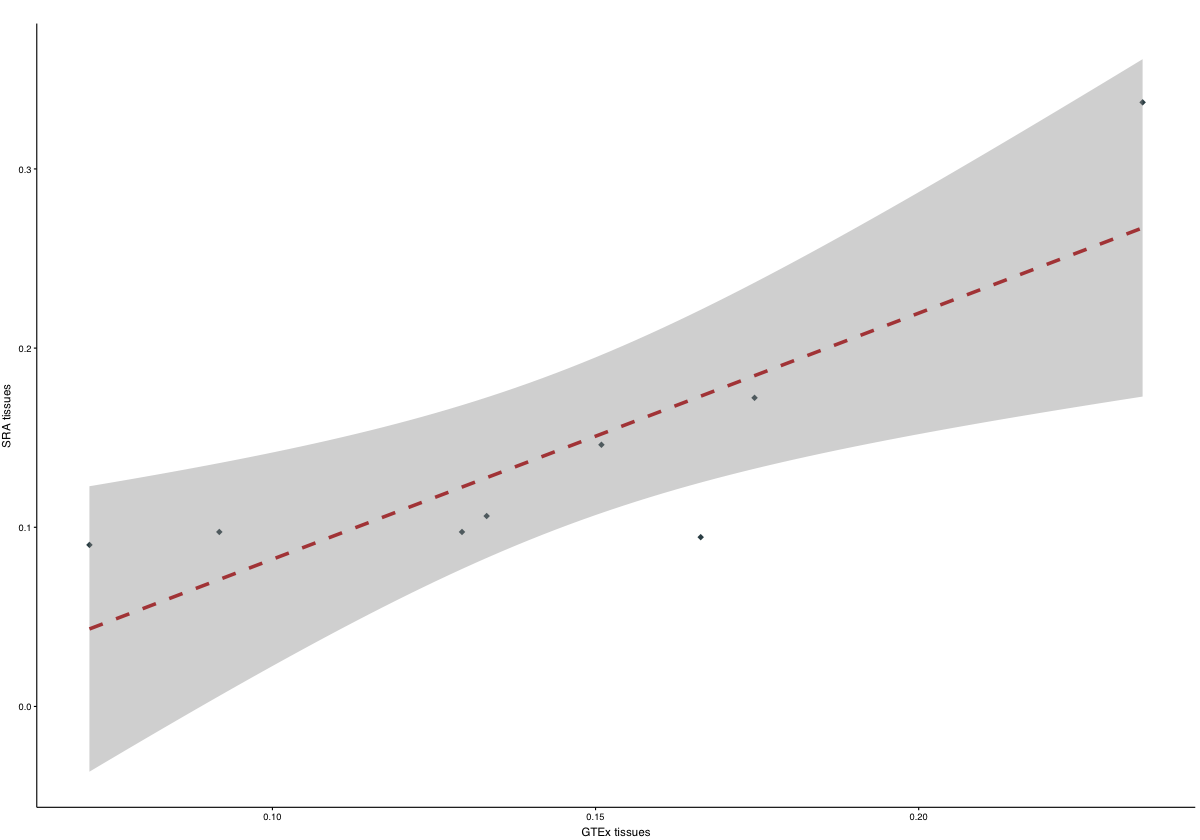

In [134]:
#calculate and visualize the correlation between GTEx tissues and SRA tissues
shared_tissues <- intersect(unique(rt_gtex$organ), unique(rt_sra$tissue))
rt_gtex_shared <- rt_gtex[rt_gtex$organ %in% shared_tissues & rt_gtex$group=="diff_organ", ]
rt_sra_shared <- rt_sra[rt_sra$tissue %in% shared_tissues & rt_sra$group=="diff_organ", ]
gtex_meds_shared <- aggregate(rt_gtex_shared$dfc, by=list(rt_gtex_shared$organ), median)
sra_meds_shared <- aggregate(rt_sra_shared$dfc, by=list(rt_sra_shared$tissue), median)
cor_dat <- cbind(gtex_meds_shared, sra_meds_shared[match(gtex_meds_shared[,1], sra_meds_shared[,1]), ])

cor.test(cor_dat[,2], cor_dat[,4])
colnames(cor_dat) <- c("tissue", "GTEx_tissues", "tissue2", "SRA_tissues")
ggplot(cor_dat, aes(x=GTEx_tissues, y=SRA_tissues)) + 
  geom_point(shape=18, color=col_sz[7])+
  geom_smooth(method=lm, se=TRUE, linetype="dashed",
             color=col_sz[4]) +
    labs(title="",
       x="GTEx tissues", y = "SRA tissues")+
  theme_Publication() +
    theme(panel.grid.major = element_blank())
ggsave(paste0(vis_dir, "/Figure1f.cor_GTEx_SRA.pdf"), width = 2.1, height = 2, units = "in")

In [135]:
#read in the non-human tissue data
non_human_rt <- read.csv("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/dge_data_collection/fc_stat_stat/non-human_species.all_reads.DESeq2.logCPM5.stat.same_diff_organ", header=F, sep="\t")
colnames(non_human_rt) <- c("path", "dfc", "p", "group")
non_human_rt$study <- "Non-human tissues"

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”



	Wilcoxon rank sum test with continuity correction

data:  test_dat[test_dat$group == "same_organ", "dfc"] and test_dat[test_dat$group == "diff_organ", "dfc"]
W = 8632, p-value = 5.124e-11
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  test_dat[test_dat$group == "same_organ", "dfc"] and test_dat[test_dat$group == "diff_organ", "dfc"]
W = 448, p-value = 0.01267
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum exact test

data:  test_dat[test_dat$group == "same_organ", "dfc"] and test_dat[test_dat$group == "diff_organ", "dfc"]
W = 0, p-value = 6.99e-08
alternative hypothesis: true location shift is less than 0


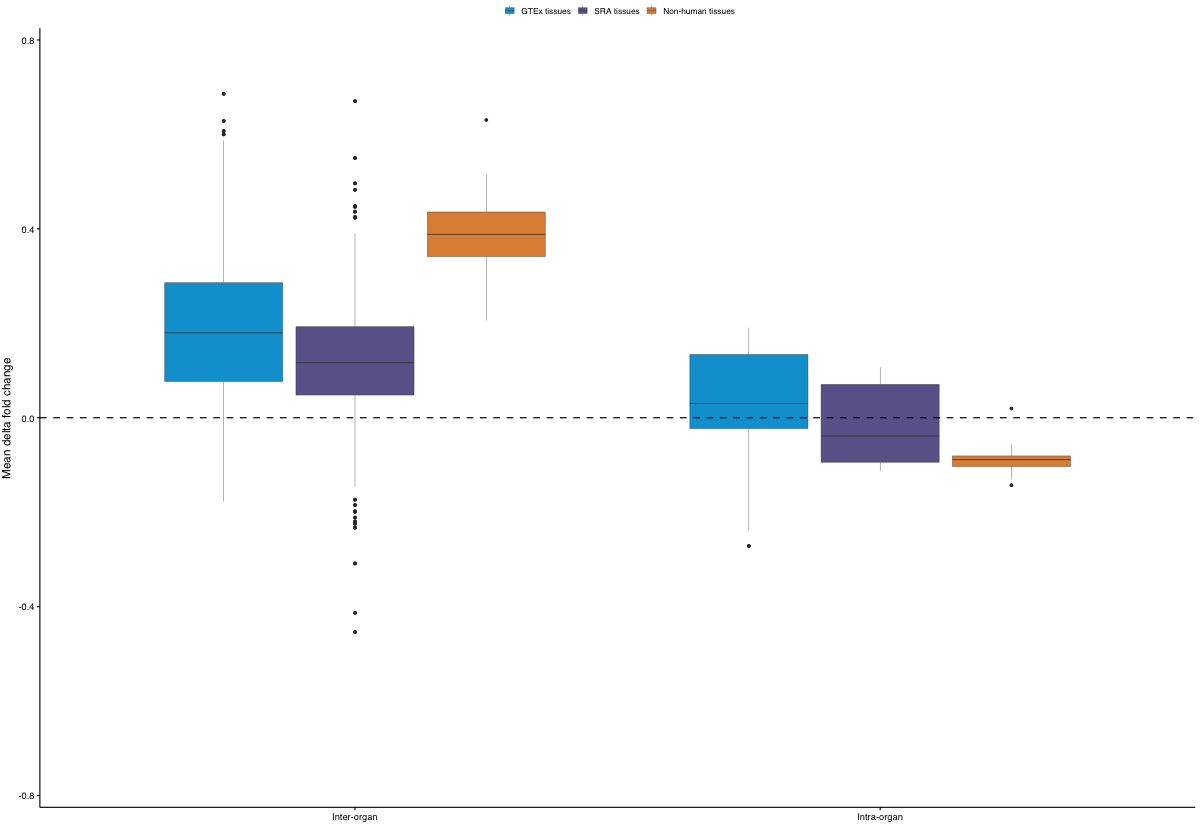

In [136]:
#generate the boxplot for the inter-organ and intra-organ tissues comparison in GTEx tissue, SRA tissue and non-human tissue datasets
same_diff_tissue_cols <- c("group", "study", "dfc")
same_diff_tissue_dat <- rbind(rt_gtex[,same_diff_tissue_cols], ori_sra_rt[,same_diff_tissue_cols], non_human_rt[,same_diff_tissue_cols])
same_diff_tissue_dat$study <- factor(same_diff_tissue_dat$study, levels=c("GTEx tissues", "SRA tissues", "Non-human tissues"))
same_diff_tissue_dat$group2 <- same_diff_tissue_dat$group
same_diff_tissue_dat$group2[same_diff_tissue_dat$group=="diff_organ"] <- "Inter-organ"
same_diff_tissue_dat$group2[same_diff_tissue_dat$group=="same_organ"] <- "Intra-organ"

p <- ggplot(data = same_diff_tissue_dat, aes(x=group2, y=dfc)) + 
             geom_boxplot(aes(fill=study), lwd=0.1, outlier.size = 0.4) +
scale_y_continuous(limits=c(-0.75,0.75))
p+ geom_hline(yintercept=0, linetype="dashed", color = "#060606", size=0.35) + 
      theme_Publication() +
      scale_fill_manual(values=col_sz) +
      theme(panel.grid.major = element_blank(),
           legend.key.size = unit(0.25, 'cm'),
           legend.position="top",
           legend.text=element_text(size=pt_sz-2)) +
      guides(fill=guide_legend(title="")) +
      labs(y= "Mean delta fold change", x="")



ggsave(paste0(vis_dir, "/Figure1g.inter_intra_organ_boxplot.pdf"), width = 2.1, height = 2, units = "in")

test_dat <- same_diff_tissue_dat[same_diff_tissue_dat$study=="GTEx tissues",]
wilcox.test(test_dat[test_dat$group=="same_organ","dfc"], test_dat[test_dat$group=="diff_organ","dfc"], alternative = c("less"))

test_dat <- same_diff_tissue_dat[same_diff_tissue_dat$study=="SRA tissues",]
wilcox.test(test_dat[test_dat$group=="same_organ","dfc"], test_dat[test_dat$group=="diff_organ","dfc"], alternative = c("less"))

test_dat <- same_diff_tissue_dat[same_diff_tissue_dat$study=="Non-human tissues",]
wilcox.test(test_dat[test_dat$group=="same_organ","dfc"], test_dat[test_dat$group=="diff_organ","dfc"], alternative = c("less"))